# Timeline Gantt
Make a gantt chart using matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

## Data
Or, import from CSV with the given columns, and convert dates to datetime
```
df = pd.read_csv("path/to/data.csv")
df['start'] = df['start'].apply(lambda d: pd.to_datetime(d))
df['end'] = df['end'].apply(lambda d: pd.to_datetime(d))
```

In [232]:
df = pd.DataFrame({'task': ['WP 1: Literature Review & Project Scope Definition', 
                            'WP 2:  System Design and Architectures', 
                            'WP 3: Data Processing and Preparation', 
                            'WP 4: Prototype Implementation / Proof of Concept', 
                            'WP 5: Evaluation & Testing'],
                   'team': ['Research', 
                           'Research', 
                           'Research', 
                           'Research', 
                           'Research'],
                   'start': pd.to_datetime(['16 Jun 2025', 
                                           '16 Sep 2025', 
                                           '16 Oct 2025', 
                                           '16 Nov 2025', 
                                           '16 Apr 2026']),
                   'end': pd.to_datetime(['16 Dec 2025', 
                                         '16 Dec 2025', 
                                         '16 Dec 2025', 
                                         '16 May 2026', 
                                         '16 Jun 2026']),
                   'completion_frac': [0.35, 0.0, 0, 0, 0]})

In [233]:
df

,task,team,start,end,completion_frac
0,WP 1: Literature Review & Project Scope Defini...,Research,2025-06-16,2025-12-16,0.35
1,WP 2: System Design and Architectures,Research,2025-09-16,2025-12-16,0.00
2,WP 3: Data Processing and Preparation,Research,2025-10-16,2025-12-16,0.00
3,WP 4: Prototype Implementation / Proof of Concept,Research,2025-11-16,2026-05-16,0.00
4,WP 5: Evaluation & Testing,Research,2026-04-16,2026-06-16,0.00


### Data transformations

In [234]:
df['days_to_start'] = (df['start'] - df['start'].min()).dt.days
df['days_to_end'] = (df['end'] - df['start'].min()).dt.days
df['task_duration'] = df['days_to_end'] - df['days_to_start'] + 1  # +1 to include also the end date
df['completion_days'] = df['completion_frac'] * df['task_duration']

## Chart

### Parameters

In [235]:
start_date = pd.to_datetime('Jun 16 2025') # start date of the project
curr_date = pd.to_datetime('Aug 11 2025')  # day of "we are here"
team_colors = {'Research': '#013648'}      # if there is more than one team in the dataset, add them here.
interval_days = 14                         # number of days between vertical graph lines (x-ticks)
output_path = 'timeline.png'               # path and name of the png

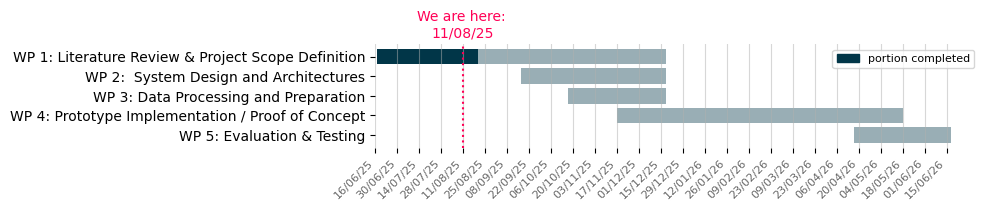

In [237]:
fig, ax = plt.subplots(figsize=[10,2.25]) # the width and height of the plot. Will need to be adjusted depending on the number of tasks

xticks = np.arange(0, df['days_to_end'].max() + 2, interval_days)
xticklabels = pd.date_range(start=df['start'].min() + dt.timedelta(days=0), end=df['end'].max()).strftime("%d/%m/%y")

patches = []
for team in team_colors:
    patches.append(matplotlib.patches.Patch(color=team_colors[team]))
    
for index, row in df.iterrows():
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=team_colors[row['team']], alpha=0.4)
    plt.barh(y=row['task'], width=row['completion_days'], left=row['days_to_start'] + 1, color=team_colors[row['team']])

# plt.title('Project timeline', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::interval_days],rotation=45, fontsize=8, ha='right', c='#666666')
ax.xaxis.grid(True, alpha=0.5)
ax.legend(handles=patches, labels=['portion completed'], fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Marking the current date on the chart
num_days = (curr_date - start_date).days
ax.axvline(x=num_days, color='#ff0055', linestyle='dotted')
ax.text(x=num_days, y=-1, s='We are here: \n'+curr_date.strftime("%d/%m/%y"), color='#ff0055',rotation=0, ha='center')
plt.tight_layout()
plt.savefig(output_path,format='png',dpi=300)
plt.show()